# Machine learning part 2

## This script contains the following:

## 1. Importing libraries and data and renaming columns

## 2. The elbow technique

## 3. k-means clusteri

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define the path to the data files
path = r'/Users/milivanili/Desktop/CF Document 6'

In [4]:

# Import the df_death_pop_income.csv data

df = pd.read_csv(os.path.join(path,'01 Data','Prepared Data','df_cause_income.csv'))

In [5]:
df.shape

(6150, 41)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Country Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,...,Non-exclusive breastfeeding,Iron deficiency,Continents,Decade,Environmental Factors,Lifestyle Factors,Health Conditions,Maternal and Child Health,Population,IncomeGroup
0,0,0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,...,2216,564,Asia,90s,48866,25472,49180,45690,10694796.0,Low income
1,1,1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,...,2501,611,Asia,90s,51304,25896,49839,48766,10745167.0,Low income
2,2,2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,...,3053,700,Asia,90s,56747,26580,50902,55866,12057433.0,Low income
3,3,3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,...,3726,773,Asia,90s,64328,27459,52482,64602,14003760.0,Low income
4,4,4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,...,3833,812,Asia,90s,66972,28342,54210,69139,15455555.0,Low income


In [7]:
#Dropping non-numerical and grouped columns columns
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0','Country','Country Code','IncomeGroup','Continents','Decade','Health Conditions','Maternal and Child Health','Lifestyle Factors','Environmental Factors'])

In [8]:
#Check for missing values
missing_values = df.isnull().sum()

In [9]:
missing_values

Year                                          0
Outdoor air pollution                         0
High systolic blood pressure                  0
Diet high in sodium                           0
Diet low in whole grains                      0
Alcohol use                                   0
Diet low in fruits                            0
Unsafe water source                           0
Secondhand smoke                              0
Low birth weight                              0
Child wasting                                 0
Unsafe sex                                    0
Diet low in nuts and seeds                    0
Household air pollution from solid fuels      0
Diet low in Vegetables                        0
Low physical activity                         0
Smoking                                       0
High fasting plasma glucose                   0
Air pollution                                 0
High body mass index                          0
Unsafe sanitation                       

In [10]:
# Check for missing values in the Population and IncomeGroup columns
missing_values = df['Population'].isnull().sum()

In [11]:
# Interpolate missing population values
df['Population'] = df['Population'].interpolate(method='linear')

In [12]:
# Verify that there are no more missing values in Population and IncomeGroup
missing_values_after = df['Population'].isnull().sum()

missing_values_after

0

#### Normalizing death count by population

In [13]:
# Updated list of columns related to death counts, based on the exact column names in the dataframe
death_count_columns_updated = [
 'Outdoor air pollution',
 'High systolic blood pressure',
 'Diet high in sodium ',
 'Diet low in whole grains',
 'Alcohol use',
 'Diet low in fruits',
 'Unsafe water source',
 'Secondhand smoke',
 'Low birth weight',
 'Child wasting',
 'Unsafe sex',
 'Diet low in nuts and seeds',
 'Household air pollution from solid fuels',
 'Diet low in Vegetables',
 'Low physical activity',
 'Smoking',
 'High fasting plasma glucose',
 'Air pollution',
 'High body mass index',
 'Unsafe sanitation',
 'No access to handwashing facility',
 'Drug use',
 'Low bone mineral density',
 'Vitamin A deficiency',
 'Child stunted growt',
 'Discontinued breastfeeding',
 'Non-exclusive breastfeeding',
 'Iron deficiency']

# Normalize the death count columns by the population column
for column in death_count_columns_updated:
    df[column] = df[column] / df['Population']

# Display the first few rows to verify the normalization
df.head()

,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,...,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunted growt,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency,Population
0,1990,0.000296,0.002397,0.000098,0.000662,0.000033,0.000298,0.000346,0.000448,0.001509,...,0.000262,0.000451,0.000016,0.000036,0.000189,0.000719,0.000010,0.000207,0.000053,10694796.0
1,1991,0.000300,0.002408,0.000098,0.000665,0.000034,0.000302,0.000401,0.000458,0.001668,...,0.000303,0.000477,0.000017,0.000036,0.000191,0.000734,0.000011,0.000233,0.000057,10745167.0
2,1992,0.000282,0.002182,0.000089,0.000605,0.000031,0.000278,0.000444,0.000438,0.001758,...,0.000335,0.000488,0.000017,0.000033,0.000174,0.000711,0.000012,0.000253,0.000058,12057433.0
3,1993,0.000259,0.001925,0.000079,0.000535,0.000028,0.000249,0.000511,0.000409,0.001699,...,0.000385,0.000500,0.000017,0.000029,0.000165,0.000705,0.000015,0.000266,0.000055,14003760.0
4,1994,0.000245,0.001790,0.000073,0.000498,0.000026,0.000234,0.000465,0.000391,0.001609,...,0.000351,0.000480,0.000016,0.000027,0.000172,0.000714,0.000013,0.000248,0.000053,15455555.0


### 2. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

[-9.556752053667273e+19,
 -1.0980498955536902e+19,
 -4.2242161660075095e+18,
 -2.6396203230484285e+18,
 -1.7407969944026806e+18,
 -1.1503122755105002e+18,
 -8.561210070466532e+17,
 -6.420244472036367e+17,
 -4.8599640412194906e+17]

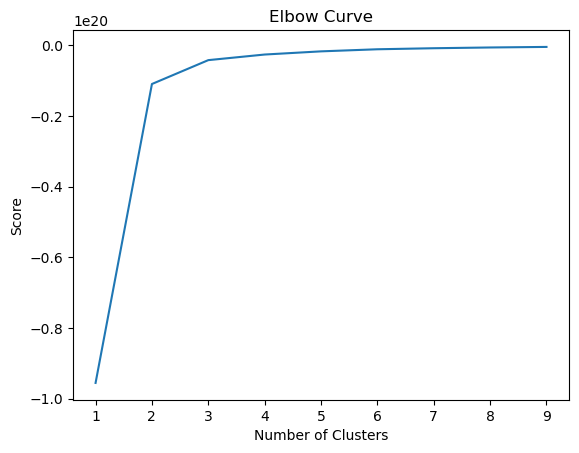

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. K-mean clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

/Users/milivanili/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
df.head()

,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,...,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunted growt,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency,Population,clusters
0,1990,0.000296,0.002397,0.000098,0.000662,0.000033,0.000298,0.000346,0.000448,0.001509,...,0.000451,0.000016,0.000036,0.000189,0.000719,0.000010,0.000207,0.000053,10694796.0,0
1,1991,0.000300,0.002408,0.000098,0.000665,0.000034,0.000302,0.000401,0.000458,0.001668,...,0.000477,0.000017,0.000036,0.000191,0.000734,0.000011,0.000233,0.000057,10745167.0,0
2,1992,0.000282,0.002182,0.000089,0.000605,0.000031,0.000278,0.000444,0.000438,0.001758,...,0.000488,0.000017,0.000033,0.000174,0.000711,0.000012,0.000253,0.000058,12057433.0,0
3,1993,0.000259,0.001925,0.000079,0.000535,0.000028,0.000249,0.000511,0.000409,0.001699,...,0.000500,0.000017,0.000029,0.000165,0.000705,0.000015,0.000266,0.000055,14003760.0,0
4,1994,0.000245,0.001790,0.000073,0.000498,0.000026,0.000234,0.000465,0.000391,0.001609,...,0.000480,0.000016,0.000027,0.000172,0.000714,0.000013,0.000248,0.000053,15455555.0,0


In [21]:
df['clusters'].value_counts()

clusters
0    5687
2     403
1      60
Name: count, dtype: int64

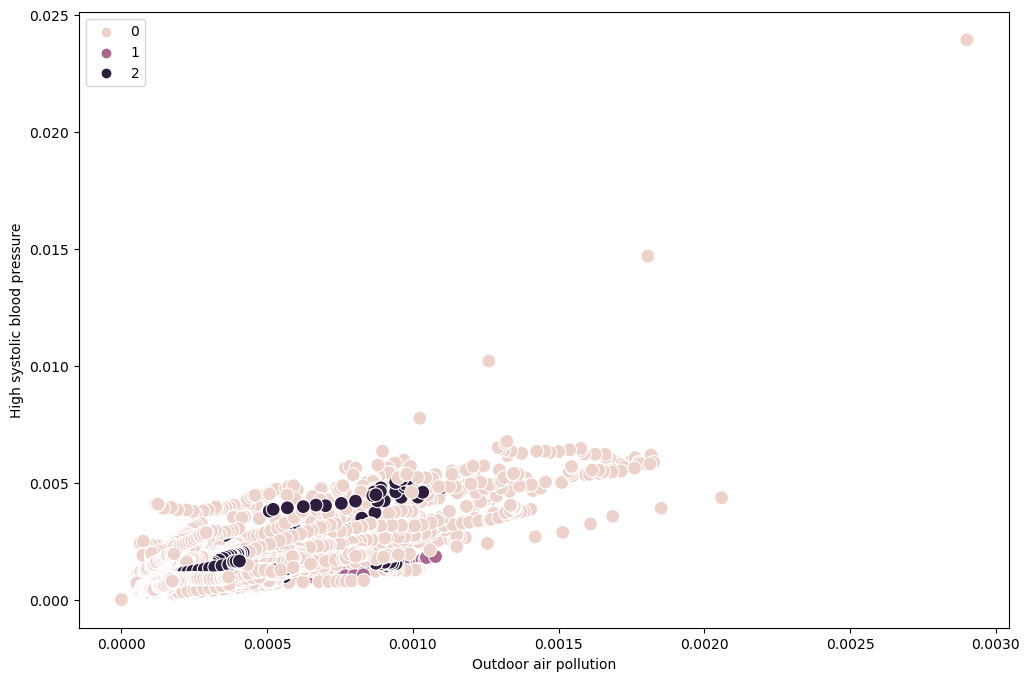

In [22]:
# Plot the clusters for the "Outdoor air pollution" and "High systolic blood pressure" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Outdoor air pollution'], y=df['High systolic blood pressure'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Outdoor air pollution') # Label x-axis.
plt.ylabel('High systolic blood pressure') # Label y-axis.
plt.show()

####  This correlation is evident within each cluster, though the strength and spread of the correlation vary.
#### Cluster 2 shows a stronger and more concentrated positive correlation.
#### Cluster 1 and Cluster 0 also show positive correlations but with more variability and spread.
##### The presence of outliers highlights the need for further investigation to understand the reasons behind these deviations.

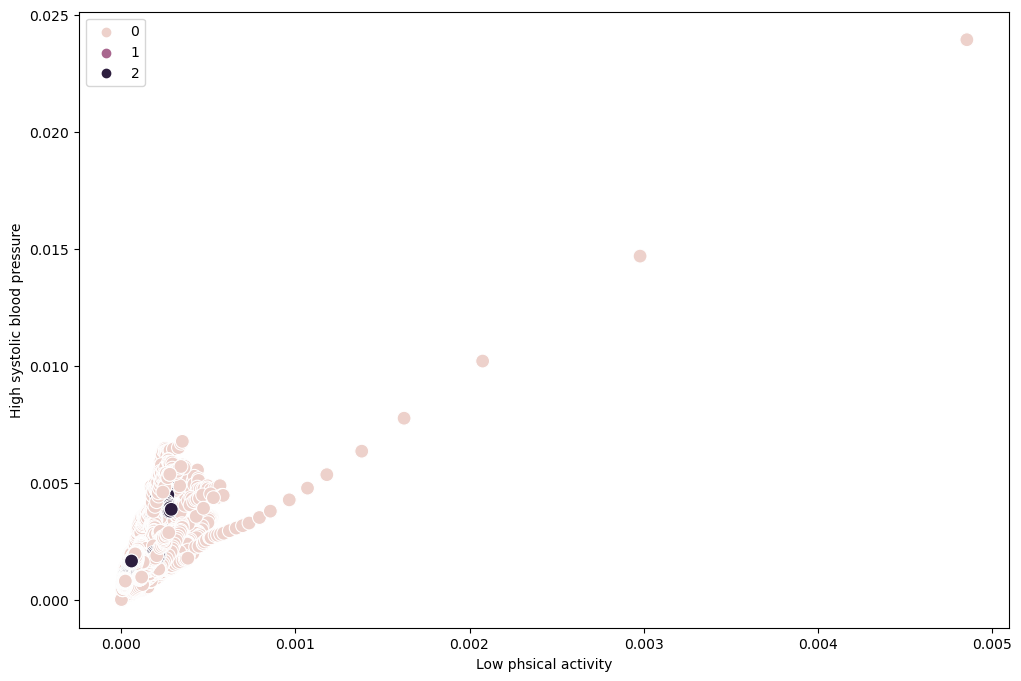

In [23]:
# Plot the clusters for the "Low physical activity" and "High systolic blood pressure" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Low physical activity'], y=df['High systolic blood pressure'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Low phsical activity') # Label x-axis.
plt.ylabel('High systolic blood pressure') # Label y-axis.
plt.show()

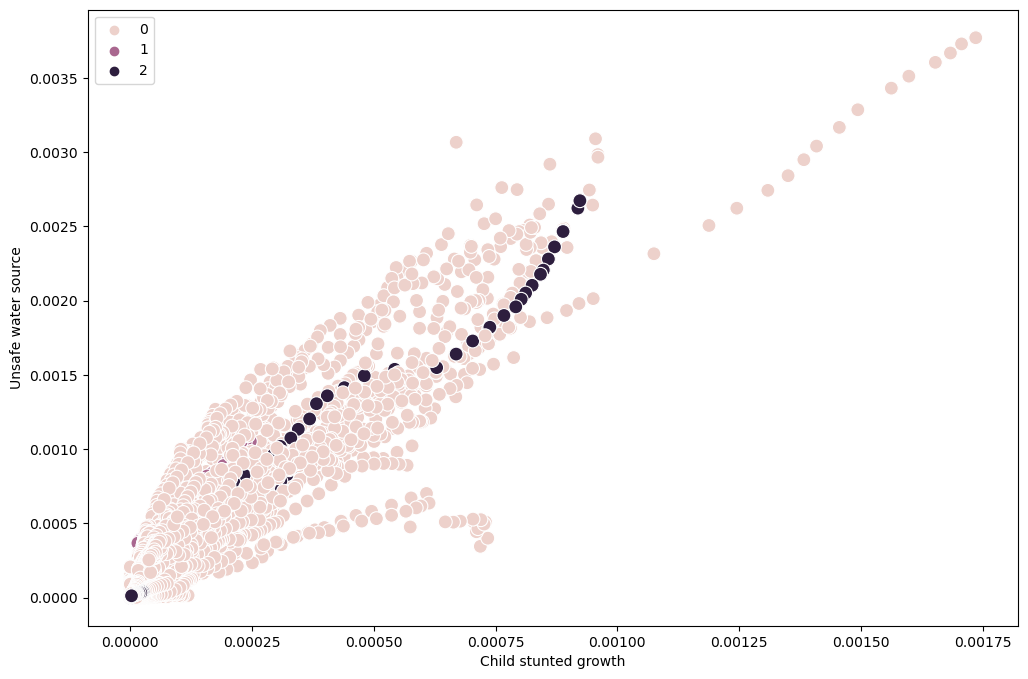

In [24]:
# Plot the clusters for the "Child stunted growt" and "Unsafe water source" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Child stunted growt'], y=df['Unsafe water source'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Child stunted growth') # Label x-axis.
plt.ylabel('Unsafe water source') # Label y-axis.

plt.show()

#### Here are several outliers, especially in Cluster 0 , where some data points show higher values of unsafe water sources at lower levels of child stunted growth.

In [25]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df.groupby('cluster').agg({'High systolic blood pressure':['mean', 'median'], 
                         'Outdoor air pollution':['mean', 'median'], 
                         'High body mass index':['mean', 'median'],
                          'Child stunted growt':['mean', 'median'],
                           'Unsafe water source':['mean', 'median']})

High systolic blood pressure           Outdoor air pollution  \
                                    mean    median                  mean   
cluster                                                                    
dark purple                     0.001381  0.001100              0.000359   
pink                            0.001469  0.001157              0.000359   
purple                          0.001130  0.001070              0.000682   

                      High body mass index           Child stunted growt  \
               median                 mean    median                mean   
cluster                                                                    
dark purple  0.000289             0.000614  0.000416            0.000081   
pink         0.000275             0.000765  0.000640            0.000085   
purple       0.000660             0.000290  0.000270            0.000063   

                      Unsafe water source            
               median                mean    median  
cluster                                              
dark purple  0.000010            0.000256  0.000039  
pink         0.000004            0.000274  0.000029  
purple       0.000035            0.000345  0.000217


High systolic bllod pressure:
The pink cluster has the highest mean and median values for high systolic blood pressure, indicating that this cluster has a higher prevalence of high blood pressure.

Outdoor Air Pollution:
The purple cluster has significantly higher mean and median values for outdoor air pollution compared to the other clusters, indicating that this cluster experiences the highest levels of air pollution.

High Body Mass Index:
The pink cluster shows the highest mean and median values for BMI, suggesting that individuals in this cluster have higher body mass indexes on average.

Child Stunted Growth:
Although the pink cluster has the highest mean value for child stunted growth, the median is much lower,possible outliers or a skewed distribution.
The purple cluster has a higher median for child stunted growth compared to the other clusters, j a more consistent issue across the cluster.

Unsafe Water Source:
The purple cluster has the highest mean and median values for unsafe water sources, indicating this cluster faces the greatest issues with water safety.
